In [1]:
import librosa
import numpy as np
import os
import Data_Processing.ourLTFATStft as ols
import ltfatpy
import imageio
import math
import glob
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display

fft_hop_size = 64
fft_window_length = 256
clipBelow = -80
anStftWrapper = ols.LTFATStft()
sampling_fre = 8000
imagesize = 64
trunk_step = 26
bit_num = 16
count = 0
n_mels= 64

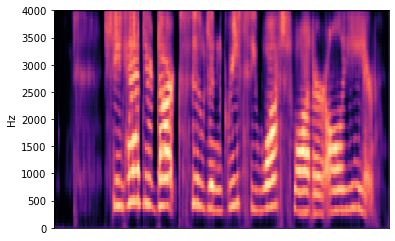

In [8]:
imagenames = sorted(glob.glob("./ADMM_Results/audio_compression-0-8bit/*_syn-8bit.png")) # Path to the reconstructed audio mel-spectrogram files
for name in imagenames: 
    # Read spectrogram
    im = imageio.imread(name)
    
    # Transform spectrogram to WAV file
    mel = np.array(im).astype(np.float64)/(2**(bit_num)-1)
    M_db_rec = (mel-1)*(-1*clipBelow)
    M_rec = librosa.db_to_power(M_db_rec, ref=1.)
    audio_rec = librosa.feature.inverse.mel_to_audio(M_rec, sr=sampling_fre, n_fft=fft_window_length, hop_length=fft_hop_size)
    break
# Display spectrogram
librosa.display.specshow(mel, sr=sampling_fre, y_axis='hz')
# Play Audio
ipd.Audio(audio_rec, rate=sampling_fre)

In [2]:
def get_M_db_from_audio(name):
    """This function is for converting audio to mel-spectrogram, just for visualization.
    """
    audio, sr = librosa.core.load(name, sr=sampling_fre, mono=True)
    audio_orig = audio

    M = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels, n_fft=fft_window_length, hop_length=fft_hop_size)
    
    M_db = librosa.power_to_db(M, ref=1.0)
    
    
    M_db = np.maximum(M_db, clipBelow)
    M_db = M_db/(-1*clipBelow) + 1
    return M_db